In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('choicesLINKernel.pickle', 'rb') as f:
    allChoices = pickle.load(f)

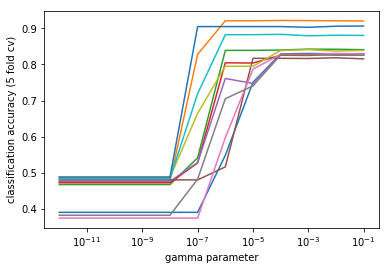

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
scale = scale[:12]
for choices in allChoices:
    (gamma,regscale,scores) = choices
    ax.plot(scale,np.max(scores,1))
ax.set_xscale("log")
ax.set_xlabel('gamma parameter')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.show()
fig.savefig('gamma_para.pdf')

In [4]:
# After a threshold value, similar performance is achievable for different choice of regscale.
# Threshold value varies only by atmost a single step.
# Above results using 10 points on a scale between mu values to be estimated.

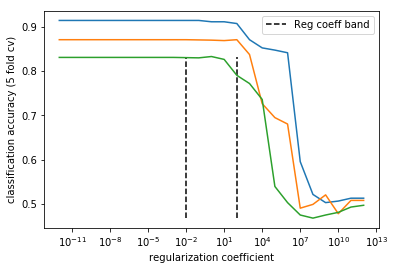

In [72]:
(regscale,scores) = allChoices[0]
lim1 = np.argmin(regscale) 
lim2 = np.argmax(regscale)

scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
for choices in allChoices[1:4]:
    (regscale,scores) = choices
    ax.plot(scale[:],scores[:])
ax.set_xscale("log")
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('classification accuracy (5 fold cv)')
ax.vlines(regscale[lim1]*1e1,min(scores),max(scores),linestyles= '--',label = 'Reg coeff band')
ax.vlines(regscale[lim2]*1e1,min(scores),max(scores),linestyles='--')
plt.legend()
plt.show()
fig.savefig('LinearChoice.pdf')

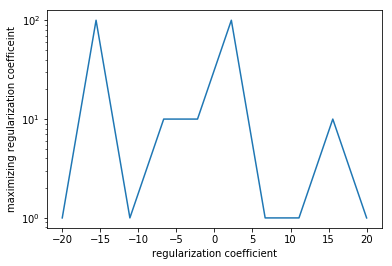

In [59]:
muvalues = np.linspace(-20,20,10)
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
i = 0
maxscores =[]
for choices in allChoices[1:]:
    (regscale,scores) = choices
    maxscores.append(scale[np.argmax(scores[12:16])+12])
ax.plot(muvalues,maxscores)
ax.set_yscale("log")
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('maximizing regularization coefficeint')
plt.show()
fig.savefig('reg_coeff.pdf')

In [8]:
#Also means if you want a faster estimation and a dont mind being slightly less precise, you can do a one time calculation and use fixed classifier parameters.
# In that case, only run kernel classification the number of points that are being estimated.

In [9]:
#I have for my experiments used made a one time selection of lernel parameter values and narrow regscale bounds using typical mu value,
#and made a choice of 20 regularizers for each classification, on the narrow regscale. - Using a single validation set.

In [60]:
with open('choicesLINKernel.pickle', 'rb') as f:
    allChoices = pickle.load(f)

In [37]:
# Scaling the gram matrix it is found allows much less drastic magnitudes for regularization coeffcient choice than base KLR.
# Standardization again results in a choice of regularization coefficient of large magnitudes.
# In the case of scaled gram matrix, it is observed that the regularization coefficeint changes less drastically and 
#  nearby mu values select regularization coefficeints of similar magnitudes.

In [28]:
muvalues =np.linspace(-20,20,10)

In [36]:
muvalues[5]

2.2222222222222214

In [57]:
regscale

array([  1.00000000e-01,   5.27263158e+01,   1.05352632e+02,
         1.57978947e+02,   2.10605263e+02,   2.63231579e+02,
         3.15857895e+02,   3.68484211e+02,   4.21110526e+02,
         4.73736842e+02,   5.26363158e+02,   5.78989474e+02,
         6.31615789e+02,   6.84242105e+02,   7.36868421e+02,
         7.89494737e+02,   8.42121053e+02,   8.94747368e+02,
         9.47373684e+02,   1.00000000e+03])